In [1]:
import plotly.figure_factory as figureFactory
import plotly as plotly_F


class Simulation_Plotting:

    @staticmethod
    def Simulation_Plotting(d_f, name):
        fig = figureFactory.create_gantt(d_f, colors={'#174a25': 'rgb(0, 255, 100)'}, index_col="c", showgrid_x=True,
                                         showgrid_y=True, title='Simulation', group_tasks=True)
        fig['layout']['xaxis']['rangeselector']['visible'] = False
        fig['layout']['xaxis']['rangeslider'] = dict(bgcolor='#c9d4cc')
        fig['layout']['xaxis']['type'] = 'linear'
        plotly_F.offline.plot(fig, filename=name)

In [2]:
import random

class Simulation:

    @staticmethod
    def simulation(t, N, node_list, verbose=True):
        retry = {1: "first retry", 2: "second retry", 3: "third retry"}

        number_of_Packets_Queued = 0
        history = []

        simulation_hist = []
        fail_list = []
        dropped_list = []
        failed_packet_queued = []

        for x in range(N):
            simulation_hist.append([])
            fail_list.append([])
            dropped_list.append(0)
            failed_packet_queued.append(False)

        for current_t in range(t):

            for current_node in range(N):
                failed_packet_queued[current_node] = False

            # Checking a package that is to be sent for each node
            for current_node in range(N):
                node_prob = node_list[current_node]
                randfloat = random.random()

                # Checking, if previously packet was failed
                if len(fail_list[current_node]):
                    ts_num = fail_list[current_node][-1]
                    if ts_num == current_t:
                        # Putting the previously failed packet in queue
                        simulation_hist[current_node].append(1)
                        failed_packet_queued[current_node] = True

                        history.append(dict(Task="node " + str(current_node + 1),
                                            Start=current_t + 0.1, Finish=current_t + 0.9, c='#174a25'))
                    else:
                        simulation_hist[current_node].append(0)

                else:
                    if randfloat < node_prob:
                        # Putting a packet in queue
                        simulation_hist[current_node].append(1)

                        number_of_Packets_Queued += 1
                        history.append(dict(Task="node " + str(current_node + 1),
                                            Start=current_t + 0.1, Finish=current_t + 0.9, c='#174a25'))
                    else:
                        simulation_hist[current_node].append(0)

            # Checking Collision
            number_of_Packets = 0

            for current_node in range(N):
                number_of_Packets += simulation_hist[current_node][-1]

            # Checking Collision
            if number_of_Packets > 1:

                for current_node in range(N):

                    if simulation_hist[current_node][-1]:

                        i = len(fail_list[current_node])

                        # We already have three collisions, another collision will drop the packet
                        if i >= 3:
                            fail_list[current_node] = []
                            dropped_list[current_node] += 1

                        else:
                            backoff_interval = random.randint(0, (2 ** i) - 1)

                            fail_list[current_node].append(backoff_interval + current_t + 1)

                # Packet that has been previously failed is transferred
                for curr_node in range(N):
                    if failed_packet_queued[curr_node] and number_of_Packets <= 1:
                        fail_list[curr_node] = []

        number_Packets_Transferred = number_of_Packets_Queued - sum(dropped_list)

        return history, number_Packets_Transferred


C:\Users\cnytC\AppData\Local\Continuum\anaconda3\lib\site-packages\plotly\offline\offline.py:563: UserWarning:

Your filename `sim_t=200,N=3,p1=p2=p3=0.1` didn't end with .html. Adding .html to the end of your file.

C:\Users\cnytC\AppData\Local\Continuum\anaconda3\lib\site-packages\plotly\offline\offline.py:563: UserWarning:

Your filename `sim_t=200,N=3,p1=p2=p3=0.3` didn't end with .html. Adding .html to the end of your file.

C:\Users\cnytC\AppData\Local\Continuum\anaconda3\lib\site-packages\plotly\offline\offline.py:563: UserWarning:

Your filename `sim_t=200,N=3,p1=p2=p3=0.5` didn't end with .html. Adding .html to the end of your file.

C:\Users\cnytC\AppData\Local\Continuum\anaconda3\lib\site-packages\plotly\offline\offline.py:563: UserWarning:

Your filename `sim_t=200,N=3,p1=1,p2=p3=0` didn't end with .html. Adding .html to the end of your file.





 Achieving User data throughput via X and Y Plotting
Probability and Data Throughput N=2
Plotting Queue Probability and Data Throughput N=5
Plotting Queue Probability and Data Throughput N=10


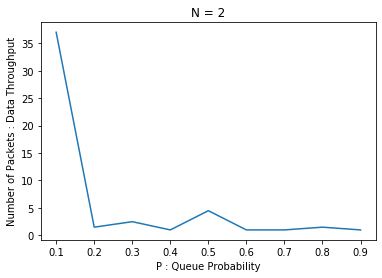

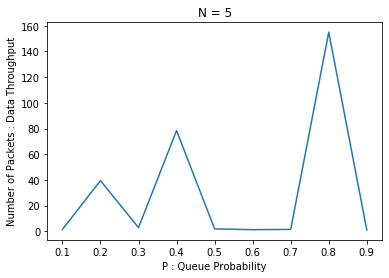

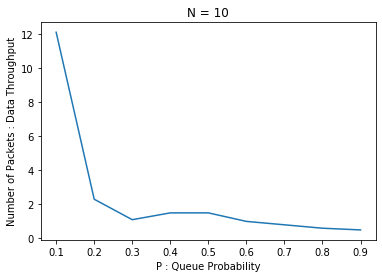

In [4]:
from matplotlib import pyplot as plot

if __name__ == "__main__":

    simulation_p = Simulation()
    simulation_plot = Simulation_Plotting()

    history, _ = simulation_p.simulation(200, 3, [0.1, 0.1, 0.1])

    simulation_plot.Simulation_Plotting(history, "sim_t=200,N=3,p1=p2=p3=0.1")

    history, _ = simulation_p.simulation(200, 3, [0.3, 0.3, 0.3])

    simulation_plot.Simulation_Plotting(history, "sim_t=200,N=3,p1=p2=p3=0.3")

    history, _ = simulation_p.simulation(200, 3, [0.5, 0.5, 0.5])

    simulation_plot.Simulation_Plotting(history, "sim_t=200,N=3,p1=p2=p3=0.5")

    history, _ = simulation_p.simulation(200, 3, [1, 0.0, 0.0])

    simulation_plot.Simulation_Plotting(history, "sim_t=200,N=3,p1=1,p2=p3=0")

    print("\n\n Achieving User data throughput via X and Y Plotting")

    Data_Plotting = {}

    for N in [2, 5, 10]:
        x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
        y = []
        for p in x:
            _, packets_transfered = simulation_p.simulation(1000, N, N * [p], False)
            Packets_Transferred_Per_Node = packets_transfered / N
            y.append(Packets_Transferred_Per_Node)
        Data_Plotting[N] = {"x": x, "y": y}

    # Plotting and Converting into PNG format
    N = 2
    print("Probability and Data Throughput N=" + str(N))
    plot.plot(Data_Plotting[N]['x'], Data_Plotting[N]['y'])
    plot.xlabel("P : Queue Probability")
    plot.ylabel("Number of Packets : Data Throughput")
    plot.title('N = ' + str(N))
    plot.savefig('Queue Probability and Data Throughput' + 'N=' + str(N) + '.png')

    N = 5
    plot.figure()
    print("Plotting Queue Probability and Data Throughput N=" + str(N))
    plot.plot(Data_Plotting[N]['x'], Data_Plotting[N]['y'])
    plot.xlabel("P : Queue Probability")
    plot.ylabel("Number of Packets : Data Throughput")
    plot.title('N = ' + str(N))
    plot.savefig('Queue Probability and Data Throughput' + 'N=' + str(N) + '.png')

    N = 10
    plot.figure()
    print("Plotting Queue Probability and Data Throughput N=" + str(N))
    plot.plot(Data_Plotting[N]['x'], Data_Plotting[N]['y'])
    plot.xlabel("P : Queue Probability")
    plot.ylabel("Number of Packets : Data Throughput")
    plot.title('N = ' + str(N))
    plot.savefig('Queue Probability and Data Throughput' + 'N=' + str(N) + '.png')
